<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('LSTM')

In [5]:
scaler = StandardScaler()

train_shape = X_train.shape
train_new_shape = X_train.shape[0] * X_train.shape[1], X_train.shape[2]
X_train = scaler.fit_transform(X_train.reshape(train_new_shape)).reshape(train_shape)

val_shape = X_val.shape
val_new_shape = X_val.shape[0] * X_val.shape[1], X_val.shape[2]
X_val = scaler.transform(X_val.reshape(val_new_shape)).reshape(val_shape)

test_shape = X_test.shape
test_new_shape = X_test.shape[0] * X_test.shape[1], X_test.shape[2]
X_test = scaler.transform(X_test.reshape(test_new_shape)).reshape(test_shape)

In [6]:
model_layers = [
    Input((X_train.shape[1], X_train.shape[2])),

    LSTM(1024, return_sequences=False),

    Dense(1024),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4431872   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 5,491,722
Trainable params: 5,491,722
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 9s 196ms/step - loss: 1.4558 - accuracy: 0.4750 - val_loss: 0.9652 - val_accuracy: 0.6400
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.8274 - accuracy: 0.7083 - val_loss: 1.0255 - val_accuracy: 0.6650
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6396 - accuracy: 0.7583 - val_loss: 1.0158 - val_accuracy: 0.6950
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.4652 - accuracy: 0.8417 - val_loss: 1.1128 - val_accuracy: 0.6700
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.3956 - accuracy: 0.8517 - val_loss: 1.0770 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3250 - accuracy: 0.8900 - val_loss: 1.0488 - val_accuracy: 0.7150
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.2383 - accuracy: 0.9150 - val_loss: 1.1253 - val_accuracy: 0.7150
Epoch

In [10]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 5ms/step - loss: 4.9109e-05 - accuracy: 1.0000
Training Accuracy: 1.0


In [11]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 3ms/step


In [12]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.95      0.95      0.95        20
           2       0.89      0.80      0.84        20
           3       0.61      0.70      0.65        20
           4       0.80      0.60      0.69        20
           5       0.87      1.00      0.93        20
           6       0.95      0.90      0.92        20
           7       0.89      0.85      0.87        20
           8       0.70      0.80      0.74        20
           9       0.65      0.75      0.70        20

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



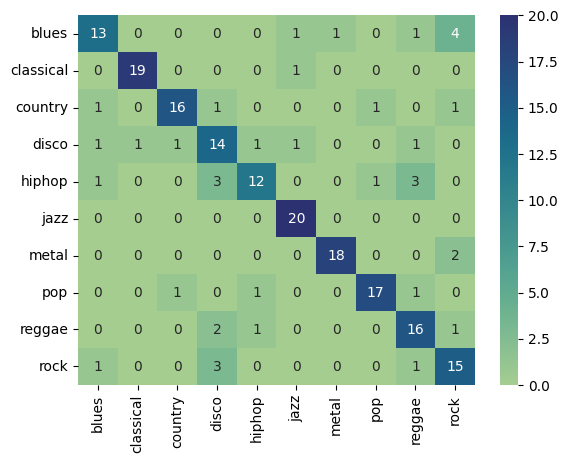

In [13]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [14]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.8


In [15]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.65
classical,0.95
country,0.80
disco,0.70
hiphop,0.60
jazz,1.00
metal,0.90
pop,0.85
reggae,0.80
rock,0.75


In [16]:
model.save('ANN.h5')